In [1]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from ydata_profiling import ProfileReport
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import plotly.express as px
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.ensemble import RandomForestClassifier
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from itertools import combinations
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from factor_analyzer import FactorAnalyzer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import r2_score
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_samples
from collections import Counter
from kmodes.kprototypes import KPrototypes
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
data = pd.read_csv('data (3).csv', index_col='date')
def Basic_Preprocessing(df):
    df.index = pd.to_datetime(df.index)
    df.index = df.index.date  

    
    df.drop(columns=['country','street'],inplace=True)
    df = df[df['price'] != 0]
    df['yr_renovated'] = df['yr_renovated'].apply(lambda x: 1 if x!=0 else 0)
    df['waterfront'] =  df['waterfront'].apply(lambda x: 1 if x!=0 else 0)
    df['yr_built'] = df['yr_built'].apply(lambda x: 1 if x > df['yr_built'].median() else 0)
    df['sqft_total'] = df['sqft_basement'] + df['sqft_above']
    df.drop(columns=['sqft_basement','sqft_above'],inplace=True)
    df.drop(columns=['statezip'],inplace=True)

    #df['month'] = pd.to_datetime(df.index).month
    #df['date'] = pd.to_datetime(df.index).day
    
    df.reset_index(drop=True, inplace=True)

    return df 

df = Basic_Preprocessing(data)

X = df.drop(columns=['price'])
y= df['price']
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)


In [3]:
# Combine X_train and X_test into a single DataFrame
X_combined = pd.concat([X_train, X_test], axis=0)

# Get the top categories in the combined dataset
top_categories = Counter(X_combined['city']).most_common(10)

# Extract the top category labels
top_category_labels = [category for category, _ in top_categories]

# Check if there are only two categories
if len(top_category_labels) == 2:
    # Create binary columns for the first category
    X_train['city_' + str(top_category_labels[0])] = (X_train['city'] == top_category_labels[0]).astype(int)
    X_test['city_' + str(top_category_labels[0])] = (X_test['city'] == top_category_labels[0]).astype(int)
else:
    # Create binary columns for each top category
    for category_label in top_category_labels:
        X_train['city_' + str(category_label)] = (X_train['city'] == category_label).astype(int)
        X_test['city_' + str(category_label)] = (X_test['city'] == category_label).astype(int)

# Remove the original 'city' column from both X_train and X_test
X_train.drop(columns=['city'], inplace=True)
X_test.drop(columns=['city'], inplace=True)

# Kmeans

  File "C:\Users\Tharindu\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Tharindu\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Tharindu\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Tharindu\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


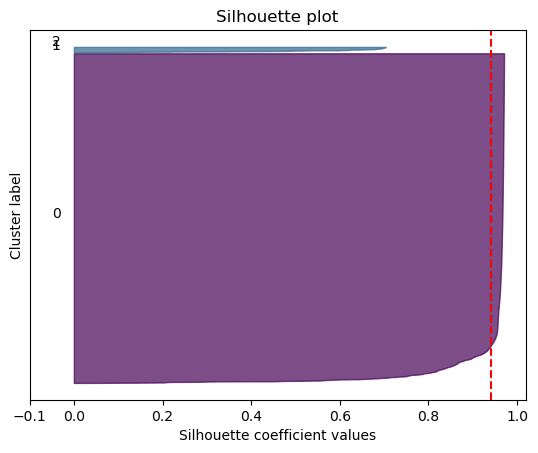

In [4]:
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_train)
clusters = kmeans.fit_predict(X_train) 

# Fit KMeans model
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(X_train)

# Compute silhouette scores
silhouette_avg = silhouette_score(X_train, cluster_labels)
sample_silhouette_values = silhouette_samples(X_train, cluster_labels)

# Create silhouette plot
fig, ax = plt.subplots()
y_lower = 10
for i in range(3):
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.viridis(float(i) / 3)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10  # 10 for the 0 samples

ax.set_title("Silhouette plot")
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax.axvline(x=silhouette_avg, color="red", linestyle="--")

ax.set_yticks([])  # Clear the yaxis labels / ticks
ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()


In [5]:
X_train['cluster_label'] = cluster_labels

In [6]:
X_train['cluster_label'].value_counts()

cluster_label
0    3581
1      59
Name: count, dtype: int64

# Kprototype

In [7]:
data = pd.read_csv('data (3).csv', index_col='date')
def Basic_Preprocessing(df):
    df.index = pd.to_datetime(df.index)
    df.index = df.index.date  

    
    df.drop(columns=['country','street'],inplace=True)
    df = df[df['price'] != 0]
    df['yr_renovated'] = df['yr_renovated'].apply(lambda x: 1 if x!=0 else 0)
    df['waterfront'] =  df['waterfront'].apply(lambda x: 1 if x!=0 else 0)
    df['yr_built'] = df['yr_built'].apply(lambda x: 1 if x > df['yr_built'].median() else 0)
    df['sqft_total'] = df['sqft_basement'] + df['sqft_above']
    df.drop(columns=['sqft_basement','sqft_above'],inplace=True)
    df.drop(columns=['statezip'],inplace=True)

    #df['month'] = pd.to_datetime(df.index).month
    #df['date'] = pd.to_datetime(df.index).day
    
    df.reset_index(drop=True, inplace=True)

    return df 

df = Basic_Preprocessing(data)

X = df.drop(columns=['price'])
y= df['price']
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)


In [8]:
from kmodes.kprototypes import KPrototypes
#X_train_3['waterfront'].replace({1: 'y', 0: 'n'}, inplace=True)
#X_train_3['yr_renovated'].replace({1: 'y', 0: 'n'}, inplace=True)
categorical_columns=[5,8,9,10]

np.random.seed(100)
# Initialize and fit the k-prototype model
kproto = KPrototypes(n_clusters=2, verbose=2,random_state=100)
clusters = kproto.fit_predict(X_train, categorical=categorical_columns)

# Access the cluster centroids and labels
centroids = kproto.cluster_centroids_
labels = kproto.labels_

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 137, ncost: 1963838915573.141
Run: 1, iteration: 2/100, moves: 22, ncost: 1891384385131.4849
Run: 1, iteration: 3/100, moves: 12, ncost: 1869316866821.1326
Run: 1, iteration: 4/100, moves: 2, ncost: 1868561585444.0679
Run: 1, iteration: 5/100, moves: 0, ncost: 1868561585444.0679
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 488, ncost: 2800702175607.3423
Run: 2, iteration: 2/100, moves: 163, ncost: 1953090758504.1423
Run: 2, iteration: 3/100, moves: 23, ncost: 1881112678122.4243
Run: 2, iteration: 4/100, moves: 9, ncost: 1868764418050.1724
Run: 2, iteration: 5/100, moves: 1, ncost: 1868561585444.0679
Run: 2, iteration: 6/1

In [9]:
X_train['cluster_label']= labels

In [10]:
X_train['cluster_label'].value_counts()

cluster_label
0    3572
1      68
Name: count, dtype: int64

# PCA => Clustering 

In [11]:
data = pd.read_csv('data (3).csv', index_col='date')
def Basic_Preprocessing(df):
    df.index = pd.to_datetime(df.index)
    df.index = df.index.date  

    
    df.drop(columns=['country','street'],inplace=True)
    df = df[df['price'] != 0]
    df['yr_renovated'] = df['yr_renovated'].apply(lambda x: 1 if x!=0 else 0)
    df['waterfront'] =  df['waterfront'].apply(lambda x: 1 if x!=0 else 0)
    df['yr_built'] = df['yr_built'].apply(lambda x: 1 if x > df['yr_built'].median() else 0)
    df['sqft_total'] = df['sqft_basement'] + df['sqft_above']
    df.drop(columns=['sqft_basement','sqft_above'],inplace=True)
    df.drop(columns=['statezip'],inplace=True)

    #df['month'] = pd.to_datetime(df.index).month
    #df['date'] = pd.to_datetime(df.index).day
    
    df.reset_index(drop=True, inplace=True)

    return df 

df = Basic_Preprocessing(data)

X = df.drop(columns=['price'])
y= df['price']
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)


In [12]:
# Combine X_train and X_test into a single DataFrame
X_combined = pd.concat([X_train, X_test], axis=0)

# Get the top categories in the combined dataset
top_categories = Counter(X_combined['city']).most_common(10)

# Extract the top category labels
top_category_labels = [category for category, _ in top_categories]

# Check if there are only two categories
if len(top_category_labels) == 2:
    # Create binary columns for the first category
    X_train['city_' + str(top_category_labels[0])] = (X_train['city'] == top_category_labels[0]).astype(int)
    X_test['city_' + str(top_category_labels[0])] = (X_test['city'] == top_category_labels[0]).astype(int)
else:
    # Create binary columns for each top category
    for category_label in top_category_labels:
        X_train['city_' + str(category_label)] = (X_train['city'] == category_label).astype(int)
        X_test['city_' + str(category_label)] = (X_test['city'] == category_label).astype(int)

# Remove the original 'city' column from both X_train and X_test
X_train.drop(columns=['city'], inplace=True)
X_test.drop(columns=['city'], inplace=True)

In [13]:
vars_to_apply_pca = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors',
                'view', 'condition']  
vars_not_to_apply_pca = [col for col in X_train.columns if col not in vars_to_apply_pca]


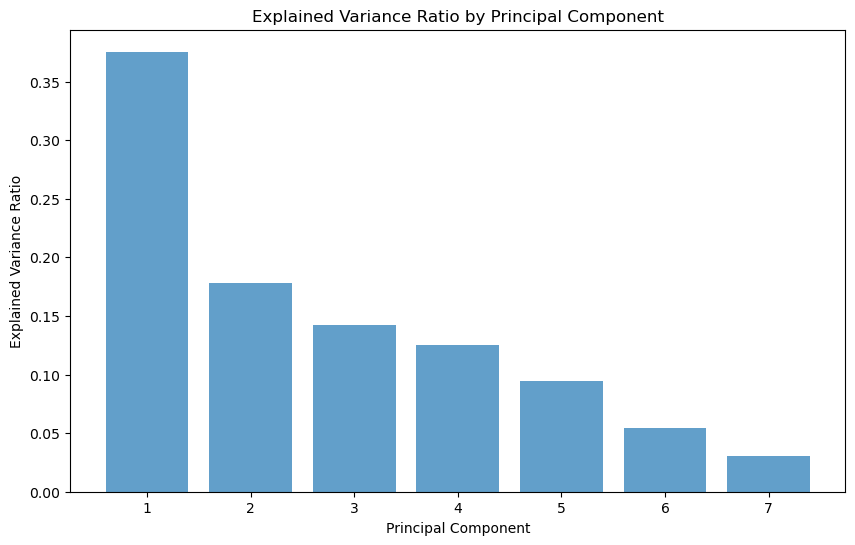

In [14]:
X_train_pca = X_train[vars_to_apply_pca]
scaler = StandardScaler()
X_train_pca_standardized = scaler.fit_transform(X_train_pca)

pca = PCA()
X_train_pca_transformed = pca.fit_transform(X_train_pca_standardized)
explained_variance_ratio = pca.explained_variance_ratio_


plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()

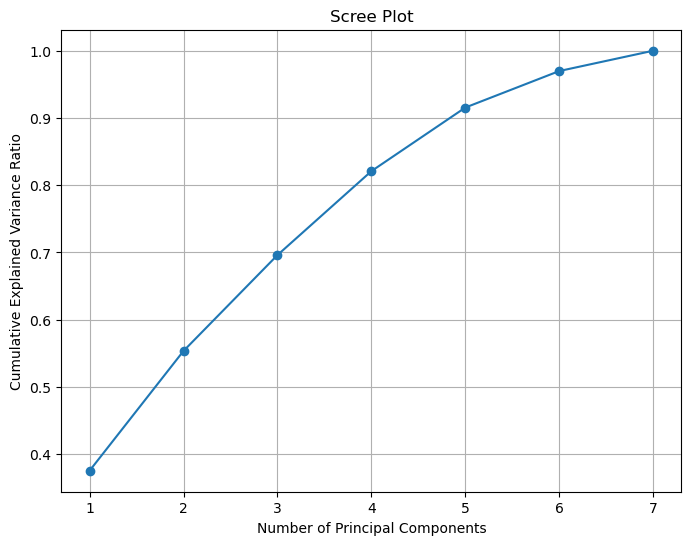

In [15]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

In [16]:
pca = PCA(n_components=4)
X_train_pca_transformed = pca.fit_transform(X_train_pca_standardized)

# Create DataFrame for X_train_pca_transformed with the index of X_train
X_train_new = pd.DataFrame(data=X_train_pca_transformed, columns=['PC1', 'PC2','PC3','PC4'], index=X_train.index)
X_train_new[vars_not_to_apply_pca] = X_train[vars_not_to_apply_pca]

In [17]:
X_test_pca = X_test[vars_to_apply_pca]
scaler = StandardScaler()
X_test_pca_standardized = scaler.fit_transform(X_test_pca)


# Apply the same PCA transformation on the standardized test set
X_test_pca_transformed = pca.transform(X_test_pca_standardized)

# Create DataFrame for X_test_pca_transformed with the index of X_test
X_test_new = pd.DataFrame(data=X_test_pca_transformed, columns=['PC1', 'PC2', 'PC3', 'PC4'], index=X_test.index)
X_test_new[vars_not_to_apply_pca] = X_test[vars_not_to_apply_pca]


In [18]:
# Yeo-Johnson transformation for pcs 
from sklearn.preprocessing import PowerTransformer

columns_to_transform = ['PC1', 'PC2', 'PC3','PC4']
transformer = PowerTransformer(method='yeo-johnson')

X_train_new[columns_to_transform] = transformer.fit_transform(X_train_new[columns_to_transform])
X_test_new[columns_to_transform] = transformer.transform(X_test_new[columns_to_transform])


# Apply logarithmic transformation to y variable (target variable)
y_train_new = np.log(y_train)
y_test_new = np.log(y_test)


# For the final evaluation 
* X_train_new , X_test_new , y_train_new , y_test_new


In [19]:
from kmodes.kprototypes import KPrototypes

categorical_columns=[4,5,6,7]

np.random.seed(100)

kproto = KPrototypes(n_clusters=3, verbose=2,random_state=100)
clusters = kproto.fit_predict(X_train_new, categorical=categorical_columns)


centroids = kproto.cluster_centroids_
labels = kproto.labels_

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 307, ncost: 12997.46226392824
Run: 1, iteration: 2/100, moves: 90, ncost: 12983.888072488975
Run: 1, iteration: 3/100, moves: 49, ncost: 12979.975079493146
Run: 1, iteration: 4/100, moves: 22, ncost: 12979.154928754948
Run: 1, iteration: 5/100, moves: 11, ncost: 12978.846010151332
Run: 1, iteration: 6/100, moves: 4, ncost: 12978.801627812609
Run: 1, iteration: 7/100, moves: 1, ncost: 12978.798076005329
Run: 1, iteration: 8/100, moves: 0, ncost: 12978.798076005329
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 948, ncost: 13994.593126352376
Run: 2, iteration: 2/100, moves: 454, ncost: 13713.637610880074
Run: 2, iteration: 3/100, moves: 187, ncost: 13637.420757468979
Run: 2, iteration: 4/100, moves: 101, ncost: 13614.028573784833
Run: 2,

In [20]:
X_train_new['cluster_label'] = labels

X_train_cluster_0 = X_train_new[X_train_new['cluster_label']==0].drop(columns=['cluster_label'])
X_train_cluster_1 = X_train_new[X_train_new['cluster_label']==1].drop(columns=['cluster_label'])
X_train_cluster_2 = X_train_new[X_train_new['cluster_label']==2].drop(columns=['cluster_label'])



# Extract target values for each cluster
y_train_cluster_0 = y_train_new[X_train_new['cluster_label'] == 0]
y_train_cluster_1 = y_train_new[X_train_new['cluster_label'] == 1]
y_train_cluster_2 = y_train_new[X_train_new['cluster_label'] == 2]


# Best model for cluster 0 

In [21]:
x_train_new , x_test_new, y_train_new_0, y_test_new_0 = train_test_split(X_train_cluster_0,y_train_cluster_0,test_size=0.2)


In [22]:
gb_params = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.5, 0.75, 1.0],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create GradientBoostingRegressor
gb_reg = GradientBoostingRegressor()

# Grid search
grid_search = GridSearchCV(estimator=gb_reg, param_grid=gb_params,
                           cv=5, scoring='neg_mean_squared_error',
                           n_jobs=-1)
# Fit GridSearchCV
grid_search.fit(x_train_new, y_train_new_0)

# Get the best model
best_gb_model_0 = grid_search.best_estimator_

In [23]:
np.sqrt(mean_squared_error(y_test_new_0,best_gb_model_0.predict(x_test_new)))

0.24621077886873732

In [24]:
np.sqrt(mean_squared_error(y_train_new_0 ,best_gb_model_0.predict(x_train_new)))

0.18032915825372917

In [25]:
######################  Random Forest Regressor ################################
rf_params = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create RandomForestRegressor
rf_reg = RandomForestRegressor()

# Grid search
grid_search_rf = GridSearchCV(estimator=rf_reg, param_grid=rf_params,
                              cv=5, scoring='neg_mean_squared_error',
                              n_jobs=-1)

# Fit GridSearchCV
grid_search_rf.fit(x_train_new, y_train_new_0)

# Get the best model
best_rf_model_0 = grid_search_rf.best_estimator_

In [26]:
np.sqrt(mean_squared_error(y_test_new_0,best_rf_model_0.predict(x_test_new)))

0.26292647608292874

In [27]:
np.sqrt(mean_squared_error(y_train_new_0,best_rf_model_0.predict(x_train_new)))

0.1082300350351303

In [28]:
from lightgbm import LGBMRegressor

# Define the parameter grid for LightGBM
lgbm_params = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [31, 50, 100, 200],
    'subsample': [0.5, 0.8, 1.0],
    'colsample_bytree': [0.5, 0.8, 1.0],
}

# Create LGBMRegressor
lgbm_reg = LGBMRegressor()

# Grid search for LightGBM
grid_search_lgbm = GridSearchCV(estimator=lgbm_reg, param_grid=lgbm_params,
                                 cv=5, scoring='neg_mean_squared_error',
                                 n_jobs=-1)

# Fit GridSearchCV for LightGBM
grid_search_lgbm.fit(x_train_new, y_train_new_0)

# Get the best LightGBM model
best_lgbm_model_0 = grid_search_lgbm.best_estimator_

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000166 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1299
[LightGBM] [Info] Number of data points in the train set: 1197, number of used features: 17
[LightGBM] [Info] Start training from score 13.228280
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warnin

In [29]:
np.sqrt(mean_squared_error(y_test_new_0,best_lgbm_model_0.predict(x_test_new)))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


0.2644717222240123

In [30]:
np.sqrt(mean_squared_error(y_train_new_0, best_lgbm_model_0.predict(x_train_new)))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


0.21310420473162198

In [31]:
from sklearn.ensemble import AdaBoostRegressor
# Define the parameter grid for AdaBoost
ada_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
}

# Create AdaBoostRegressor
ada_reg = AdaBoostRegressor()

# Grid search for AdaBoost
grid_search_ada = GridSearchCV(estimator=ada_reg, param_grid=ada_params,
                                cv=5, scoring='neg_mean_squared_error',
                                n_jobs=-1)

# Fit GridSearchCV for AdaBoost
grid_search_ada.fit(x_train_new, y_train_new_0)

# Get the best AdaBoost model
best_ada_model_0 = grid_search_ada.best_estimator_

In [32]:
np.sqrt(mean_squared_error(y_test_new_0,best_ada_model_0.predict(x_test_new)))

0.3210914598065669

In [33]:
np.sqrt(mean_squared_error(y_train_new_0, best_ada_model_0.predict(x_train_new)))

0.31722187403428953

In [34]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for ElasticNet
elastic_net_params = {
    'alpha': [0.1, 1.0, 10.0],
    'l1_ratio': [0.1, 0.5, 0.9]
}

# Create ElasticNet regressor
elastic_net = ElasticNet()

# Grid search
grid_search_elastic_net = GridSearchCV(estimator=elastic_net, param_grid=elastic_net_params,
                                       cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV
grid_search_elastic_net.fit(x_train_new, y_train_new_0)

# Get the best model
best_elastic_net_model_0 = grid_search_elastic_net.best_estimator_

In [35]:
np.sqrt(mean_squared_error(y_test_new_0, best_elastic_net_model_0.predict(x_test_new)))

0.30876394514441374

In [36]:
np.sqrt(mean_squared_error(y_train_new_0, best_elastic_net_model_0.predict(x_train_new)))

0.32675085493516287

In [37]:
from sklearn.linear_model import Ridge
# Define the parameter grid for Ridge
ridge_params = {
    'alpha': [0.1, 1.0, 10.0]
}

# Create Ridge regressor
ridge_reg = Ridge()

# Grid search
grid_search_ridge = GridSearchCV(estimator=ridge_reg, param_grid=ridge_params,
                                 cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV
grid_search_ridge.fit(x_train_new, y_train_new_0)

# Get the best model
best_ridge_model_0 = grid_search_ridge.best_estimator_

In [38]:
np.sqrt(mean_squared_error(y_test_new_0, best_ridge_model_0.predict(x_test_new)))

0.25008017226871676

In [39]:
np.sqrt(mean_squared_error(y_train_new_0,best_ridge_model_0.predict(x_train_new)))

0.27328596260880134

In [40]:
from sklearn.linear_model import Lasso

# Define the parameter grid for Lasso
lasso_params = {
    'alpha': [0.1, 1.0, 10.0],
    'max_iter': [1000, 2000, 3000]
}

# Create Lasso regressor
lasso_reg = Lasso()

# Grid search
grid_search_lasso = GridSearchCV(estimator=lasso_reg, param_grid=lasso_params,
                                 cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV
grid_search_lasso.fit(x_train_new, y_train_new_0)

# Get the best model
best_lasso_model_0 = grid_search_lasso.best_estimator_


In [41]:
np.sqrt(mean_squared_error(y_test_new_0, best_lasso_model_0.predict(x_test_new)))

0.34174307841535834

In [42]:
np.sqrt(mean_squared_error(y_train_new_0, best_lasso_model_0.predict(x_train_new)))

0.35374174500133865

# Best model for cluster 1 

In [43]:
x_train_new_1 , x_test_new_1 , y_train_new_1, y_test_new_1 = train_test_split(X_train_cluster_1,y_train_cluster_1,test_size=0.2)


In [44]:
gb_params = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.5, 0.75, 1.0],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create GradientBoostingRegressor
gb_reg = GradientBoostingRegressor()

# Grid search
grid_search = GridSearchCV(estimator=gb_reg, param_grid=gb_params,
                           cv=5, scoring='neg_mean_squared_error',
                           n_jobs=-1)
# Fit GridSearchCV
grid_search.fit(x_train_new_1, y_train_new_1)

# Get the best model
best_gb_model_1 = grid_search.best_estimator_

print(np.sqrt(mean_squared_error(y_test_new_1,best_gb_model_1.predict(x_test_new_1))))
print(np.sqrt(mean_squared_error(y_train_new_1 ,best_gb_model_1.predict(x_train_new_1))))

0.3373286334706058
0.2888362184269877


In [45]:
rf_params = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create RandomForestRegressor
rf_reg = RandomForestRegressor()

# Grid search
grid_search_rf = GridSearchCV(estimator=rf_reg, param_grid=rf_params,
                              cv=5, scoring='neg_mean_squared_error',
                              n_jobs=-1)

# Fit GridSearchCV
grid_search_rf.fit(x_train_new_1, y_train_new_1)

# Get the best model
best_rf_model_1 = grid_search_rf.best_estimator_

print(np.sqrt(mean_squared_error(y_test_new_1,best_rf_model_1.predict(x_test_new_1))))
print(np.sqrt(mean_squared_error(y_train_new_1,best_rf_model_1.predict(x_train_new_1))))

0.3342401728315264
0.22233598365146892


In [47]:
# Define the parameter grid for AdaBoost
ada_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
}

# Create AdaBoostRegressor
ada_reg = AdaBoostRegressor()

# Grid search for AdaBoost
grid_search_ada = GridSearchCV(estimator=ada_reg, param_grid=ada_params,
                                cv=5, scoring='neg_mean_squared_error',
                                n_jobs=-1)

# Fit GridSearchCV for AdaBoost
grid_search_ada.fit(x_train_new_1, y_train_new_1)

# Get the best AdaBoost model
best_ada_model_1 = grid_search_ada.best_estimator_

print(np.sqrt(mean_squared_error(y_test_new_1,best_ada_model_1.predict(x_test_new_1))))
print(np.sqrt(mean_squared_error(y_train_new_1, best_ada_model_1.predict(x_train_new_1))))

0.3829750424030235
0.363192082300507


In [48]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for ElasticNet
elastic_net_params = {
    'alpha': [0.1, 1.0, 10.0],
    'l1_ratio': [0.1, 0.5, 0.9]
}

# Create ElasticNet regressor
elastic_net = ElasticNet()

# Grid search
grid_search_elastic_net = GridSearchCV(estimator=elastic_net, param_grid=elastic_net_params,
                                       cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV
grid_search_elastic_net.fit(x_train_new_1, y_train_new_1)

# Get the best model
best_elastic_net_model_1 = grid_search_elastic_net.best_estimator_

print(np.sqrt(mean_squared_error(y_test_new_1, best_elastic_net_model_1.predict(x_test_new_1))))
print(np.sqrt(mean_squared_error(y_train_new_1, best_elastic_net_model_1.predict(x_train_new_1))))

0.37194862771212855
0.3753325412083456


In [49]:
# Define the parameter grid for Ridge
ridge_params = {
    'alpha': [0.1, 1.0, 10.0]
}

# Create Ridge regressor
ridge_reg = Ridge()

# Grid search
grid_search_ridge = GridSearchCV(estimator=ridge_reg, param_grid=ridge_params,
                                 cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV
grid_search_ridge.fit(x_train_new_1, y_train_new_1)

# Get the best model
best_ridge_model_1 = grid_search_ridge.best_estimator_


print(np.sqrt(mean_squared_error(y_test_new_1, best_ridge_model_1.predict(x_test_new_1))))
print(np.sqrt(mean_squared_error(y_train_new_1,best_ridge_model_1.predict(x_train_new_1))))

0.3249789017510868
0.32869238323124994


In [50]:
from sklearn.linear_model import Lasso

# Define the parameter grid for Lasso
lasso_params = {
    'alpha': [0.1, 1.0, 10.0],
    'max_iter': [1000, 2000, 3000]
}

# Create Lasso regressor
lasso_reg = Lasso()

# Grid search
grid_search_lasso = GridSearchCV(estimator=lasso_reg, param_grid=lasso_params,
                                 cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV
grid_search_lasso.fit(x_train_new_1, y_train_new_1)

# Get the best model
best_lasso_model_1 = grid_search_lasso.best_estimator_


print(np.sqrt(mean_squared_error(y_test_new_1, best_lasso_model_1.predict(x_test_new_1))))
print(np.sqrt(mean_squared_error(y_train_new_1, best_lasso_model_1.predict(x_train_new_1))))

0.4196620738869384
0.4139230482262574


# Best model for cluster 2 

In [51]:
x_train_new_2 , x_test_new_2 , y_train_new_2, y_test_new_2 = train_test_split(X_train_cluster_2,y_train_cluster_2,
                                                                              test_size=0.2)

In [52]:
gb_params = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.5, 0.75, 1.0],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create GradientBoostingRegressor
gb_reg = GradientBoostingRegressor()

# Grid search
grid_search = GridSearchCV(estimator=gb_reg, param_grid=gb_params,
                           cv=5, scoring='neg_mean_squared_error',
                           n_jobs=-1)
# Fit GridSearchCV
grid_search.fit(x_train_new_2, y_train_new_2)

# Get the best model
best_gb_model_2 = grid_search.best_estimator_

print(np.sqrt(mean_squared_error(y_test_new_2,best_gb_model_2.predict(x_test_new_2))))
print(np.sqrt(mean_squared_error(y_train_new_2 ,best_gb_model_2.predict(x_train_new_2))))

0.2958777729677616
0.25245692321050456


In [53]:
rf_params = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create RandomForestRegressor
rf_reg = RandomForestRegressor()

# Grid search
grid_search_rf = GridSearchCV(estimator=rf_reg, param_grid=rf_params,
                              cv=5, scoring='neg_mean_squared_error',
                              n_jobs=-1)

# Fit GridSearchCV
grid_search_rf.fit(x_train_new_2, y_train_new_2)

# Get the best model
best_rf_model_2 = grid_search_rf.best_estimator_

print(np.sqrt(mean_squared_error(y_test_new_2,best_rf_model_2.predict(x_test_new_2))))
print(np.sqrt(mean_squared_error(y_train_new_2,best_rf_model_2.predict(x_train_new_2))))


0.31878475580678944
0.17383993066943068


In [55]:
from sklearn.ensemble import AdaBoostRegressor
# Define the parameter grid for AdaBoost
ada_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
}

# Create AdaBoostRegressor
ada_reg = AdaBoostRegressor()

# Grid search for AdaBoost
grid_search_ada = GridSearchCV(estimator=ada_reg, param_grid=ada_params,
                                cv=5, scoring='neg_mean_squared_error',
                                n_jobs=-1)

# Fit GridSearchCV for AdaBoost
grid_search_ada.fit(x_train_new_2, y_train_new_2)

# Get the best AdaBoost model
best_ada_model_2 = grid_search_ada.best_estimator_

print(np.sqrt(mean_squared_error(y_test_new_2,best_ada_model_2.predict(x_test_new_2))))
print(np.sqrt(mean_squared_error(y_train_new_2, best_ada_model_2.predict(x_train_new_2))))

0.39559923761445615
0.35257178183380783


In [56]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for ElasticNet
elastic_net_params = {
    'alpha': [0.1, 1.0, 10.0],
    'l1_ratio': [0.1, 0.5, 0.9]
}

# Create ElasticNet regressor
elastic_net = ElasticNet()

# Grid search
grid_search_elastic_net = GridSearchCV(estimator=elastic_net, param_grid=elastic_net_params,
                                       cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV
grid_search_elastic_net.fit(x_train_new_2, y_train_new_2)

# Get the best model
best_elastic_net_model_2 = grid_search_elastic_net.best_estimator_

print(np.sqrt(mean_squared_error(y_test_new_2, best_elastic_net_model_2.predict(x_test_new_2))))
print(np.sqrt(mean_squared_error(y_train_new_2, best_elastic_net_model_2.predict(x_train_new_2))))

0.3932434976130421
0.3642015884295622


In [58]:
from sklearn.linear_model import Ridge
# Define the parameter grid for Ridge
ridge_params = {
    'alpha': [0.1, 1.0, 10.0]
}

# Create Ridge regressor
ridge_reg = Ridge()

# Grid search
grid_search_ridge = GridSearchCV(estimator=ridge_reg, param_grid=ridge_params,
                                 cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV
grid_search_ridge.fit(x_train_new_2, y_train_new_2)

# Get the best model
best_ridge_model_2 = grid_search_ridge.best_estimator_


print(np.sqrt(mean_squared_error(y_test_new_2, best_ridge_model_2.predict(x_test_new_2))))
print(np.sqrt(mean_squared_error(y_train_new_2,best_ridge_model_2.predict(x_train_new_2))))

0.32117793093806624
0.32382971512527964


In [59]:
from sklearn.linear_model import Lasso

# Define the parameter grid for Lasso
lasso_params = {
    'alpha': [0.1, 1.0, 10.0],
    'max_iter': [1000, 2000, 3000]
}

# Create Lasso regressor
lasso_reg = Lasso()

# Grid search
grid_search_lasso = GridSearchCV(estimator=lasso_reg, param_grid=lasso_params,
                                 cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV
grid_search_lasso.fit(x_train_new_2, y_train_new_2)

# Get the best model
best_lasso_model_2 = grid_search_lasso.best_estimator_


print(np.sqrt(mean_squared_error(y_test_new_2, best_lasso_model_2.predict(x_test_new_2))))
print(np.sqrt(mean_squared_error(y_train_new_2, best_lasso_model_2.predict(x_train_new_2))))

0.42850535486651603
0.40662988601390226


# Final Evaluation 

In [ ]:
new_data_clusters = kproto.predict(X_test_new, categorical=categorical_columns)
X_test_new['cluster_label'] = new_data_clusters


best_model_for_cluster_0 = best_ridge_model_0
best_model_for_cluster_1 = best_rf_model_1
best_model_for_cluster_2 = best_gb_model_2

In [68]:
predictions = {}
cluster_rmses = {}

# Iterate over each cluster and its corresponding best model
for cluster_label, best_model in zip(range(kproto.n_clusters), [best_model_for_cluster_0, best_model_for_cluster_1, best_model_for_cluster_2]):
    # Filter test data based on cluster label
    X_test_cluster = X_test_new[X_test_new['cluster_label'] == cluster_label]
    y_test_cluster = y_test_new[X_test_new['cluster_label'] == cluster_label]
    
    # Make predictions using the best model for this cluster
    y_pred_cluster = best_model.predict(X_test_cluster.drop(columns=['cluster_label']))
    
    # Store predictions for this cluster
    predictions[cluster_label] = (X_test_cluster, y_pred_cluster, y_test_cluster)
    
    # Calculate RMSE for this cluster
    cluster_rmse = np.sqrt(mean_squared_error(y_test_cluster, y_pred_cluster))
    cluster_rmses[cluster_label] = cluster_rmse

# Calculate RMSE for all clusters combined
all_y_pred = np.concatenate([y_pred_cluster for _, (_, y_pred_cluster, _) in predictions.items()])
all_y_test = np.concatenate([y_test_cluster for _, (_, _, y_test_cluster) in predictions.items()])
total_rmse = np.sqrt(mean_squared_error(all_y_test, all_y_pred))

print("Total RMSE:", total_rmse)
print("Cluster RMSEs:", cluster_rmses)

Total RMSE: 0.37326935648065024
Cluster RMSEs: {0: 0.29493414023519565, 1: 0.44047823035764466, 2: 0.3593471451267573}
